In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
!ls '/content/drive/MyDrive/Colab Notebooks/'

arabica_ratings_raw.csv  Untitled0.ipynb  Untitled2.ipynb


In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/arabica_ratings_raw.csv')
columns = data.columns
columns

Index(['Unnamed: 0', 'quality_score', 'view_certificate_1',
       'view_certificate_2', 'Cupping Protocol and Descriptors',
       'View Green Analysis Details', 'Request a Sample', 'Species', 'Owner',
       'Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'ICO Number',
       'Company', 'Altitude', 'Region', 'Producer', 'Number of Bags',
       'Bag Weight', 'In-Country Partner', 'Harvest Year', 'Grading Date',
       'Owner.1', 'Variety', 'Status', 'Processing Method', 'NA', 'Aroma',
       'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'NA.1',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points',
       'Total Cup Points', 'NA.2', 'Moisture', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'NA.3', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact',
       'Unnamed: 51', 'Notes', 'Price '],
      dtype='object')

In [14]:
data = data[['quality_score','Processing Method','Aroma','Flavor', 'Aftertaste', 'Acidity',
             'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points','Total Cup Points','Moisture',
             'Category One Defects', 'Quakers', 'Color', 'Category Two Defects', 'Price ']]

In [15]:
data

,quality_score,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects,Price
0,90.58,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,Sample 90.58,12%,0 full defects,0.0,Green,0 full defects,9.00
1,89.92,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,Sample 89.92,12%,0 full defects,0.0,Green,1 full defects,8.00
2,89.75,NaN,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,Sample 89.75,0%,0 full defects,0.0,NaN,0 full defects,7.80
3,89.00,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,Sample 89.00,11%,0 full defects,0.0,Green,2 full defects,7.50
4,88.83,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,Sample 88.83,12%,0 full defects,0.0,Green,2 full defects,9.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,67.92,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,Sample 67.92,14%,8 full defects,0.0,Blue-Green,16 full defects,7.75
1308,63.08,Other,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,Sample 63.08,13%,1 full defects,0.0,Green,5 full defects,7.70
1309,59.83,Washed / Wet,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,Sample 59.83,10%,0 full defects,0.0,Green,4 full defects,8.50
1310,43.13,NaN,6.00,6.00,6.25,6.88,6.00,6.00,0.00,0.00,0.00,6.00,Sample 43.13,0%,0 full defects,0.0,NaN,0 full defects,7.45


In [16]:
data['Total Cup Points'] = data['Total Cup Points'].apply(lambda x: float(x.replace('Sample', '')))
data['Moisture'] = data['Moisture'].apply(lambda x: float(x.replace('%', '')))
data['Category One Defects'] = data['Category One Defects'].apply(lambda x: float(x.replace('full defects', '')))
data['Category Two Defects'] = data['Category Two Defects'].apply(lambda x: float(x.replace('full defects', '')))
data['Quakers'] = data['Quakers'].fillna(0)
data['Processing Method'] = data['Processing Method'].fillna('Unknown')
data['Color'] = data['Color'].fillna('Unknown')

In [17]:
Color = pd.get_dummies(data[['Color']], prefix=['Color'])
Processing_Method = pd.get_dummies(data[['Processing Method']], prefix=['Processing Method'])
data = pd.concat([data, Color, Processing_Method], axis=1)
data = data.drop(columns=['Processing Method', 'Color'])

In [18]:
data.columns

Index(['quality_score', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points',
       'Total Cup Points', 'Moisture', 'Category One Defects', 'Quakers',
       'Category Two Defects', 'Price ', 'Color_Blue-Green',
       'Color_Bluish-Green', 'Color_Green', 'Color_None', 'Color_Unknown',
       'Processing Method_Natural / Dry', 'Processing Method_Other',
       'Processing Method_Pulped natural / honey',
       'Processing Method_Semi-washed / Semi-pulped',
       'Processing Method_Unknown', 'Processing Method_Washed / Wet'],
      dtype='object')

In [19]:
price = data['Price ']
data = data.drop(columns=['Price '])

In [20]:
from sklearn.model_selection import train_test_split

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(data, price, 
                                                          stratify = price,
                                                          test_size = 0.2, 
                                                          random_state = 42)

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(train, train_labels)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   19.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  5.7min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  7.7min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [23]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 100,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 10,
 'n_estimators': 100}

In [28]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy
    
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test, test_labels)

Model Performance
Average Error: 0.4146 degrees.
Accuracy = 94.46%.


In [29]:
# Get numerical feature importances
importances = list(best_grid.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: quality_score        Importance: 0.12
Variable: Total Cup Points     Importance: 0.1
Variable: Aroma                Importance: 0.07
Variable: Flavor               Importance: 0.07
Variable: Aftertaste           Importance: 0.07
Variable: Acidity              Importance: 0.07
Variable: Body                 Importance: 0.07
Variable: Balance              Importance: 0.07
Variable: Cupper Points        Importance: 0.07
Variable: Category Two Defects Importance: 0.07
Variable: Moisture             Importance: 0.06
Variable: Category One Defects Importance: 0.02
Variable: Quakers              Importance: 0.02
Variable: Color_Unknown        Importance: 0.02
Variable: Processing Method_Washed / Wet Importance: 0.02
Variable: Uniformity           Importance: 0.01
Variable: Clean Cup            Importance: 0.01
Variable: Sweetness            Importance: 0.01
Variable: Color_Bluish-Green   Importance: 0.01
Variable: Color_Green          Importance: 0.01
Variable: Processing Method_Nat

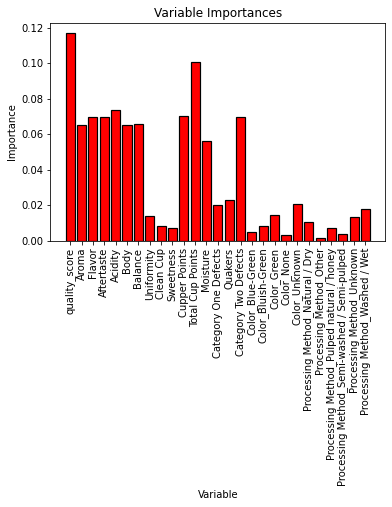

In [30]:
import matplotlib.pyplot as plt
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, data.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

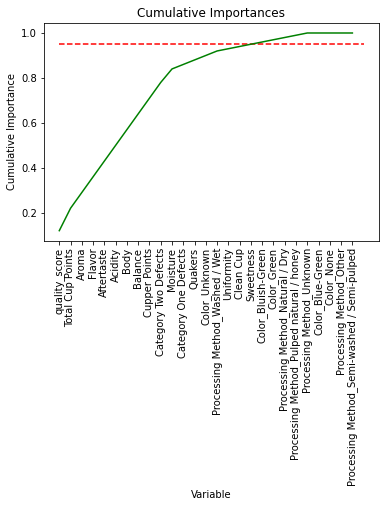

In [31]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [33]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = best_grid.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = best_grid.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = '/content/drive/MyDrive/Colab Notebooks/tree.dot', feature_names = data.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('/content/drive/MyDrive/Colab Notebooks/tree.dot')
# Write graph to a png file
graph.write_png('/content/drive/MyDrive/Colab Notebooks/tree.png')